In [8]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [9]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [11]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [12]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [13]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

629

In [14]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [15]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
       # time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | castro
Processing Record 2 of Set 1 | morondava
Processing Record 3 of Set 1 | norman wells
Processing Record 4 of Set 1 | inhambane
Processing Record 5 of Set 1 | haines junction
Processing Record 6 of Set 1 | jamestown
Processing Record 7 of Set 1 | healesville
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | tabiauea
City not found. Skipping...
Processing Record 10 of Set 1 | piterka
Processing Record 11 of Set 1 | berlevag
Processing Record 12 of Set 1 | hilo
Processing Record 13 of Set 1 | fonte boa
Processing Record 14 of Set 1 | shenjiamen
Processing Record 15 of Set 1 | qaanaaq
Processing Record 16 of Set 1 | saskylakh
Processing Record 17 of Set 1 | can
Processing Record 18 of Set 1 | butaritari
Processing Record 19 of Set 1 | touros
Processing Record 20 of Set 1 | longyearbyen
Processing Record 21 of Set 1 | kapaa
Processing Record 22 of Set 1 | punta arenas
Process

Processing Record 36 of Set 4 | pringsewu
Processing Record 37 of Set 4 | beringovskiy
Processing Record 38 of Set 4 | ribeira grande
Processing Record 39 of Set 4 | svetlaya
Processing Record 40 of Set 4 | bargal
City not found. Skipping...
Processing Record 41 of Set 4 | moree
Processing Record 42 of Set 4 | umiray
Processing Record 43 of Set 4 | kamenka
Processing Record 44 of Set 4 | lagoa
Processing Record 45 of Set 4 | sabha
Processing Record 46 of Set 4 | bethel
Processing Record 47 of Set 4 | codrington
Processing Record 48 of Set 4 | katsuura
Processing Record 49 of Set 4 | arlit
Processing Record 50 of Set 4 | pacifica
Processing Record 1 of Set 5 | mount gambier
Processing Record 2 of Set 5 | usvyaty
Processing Record 3 of Set 5 | sterling
Processing Record 4 of Set 5 | ostersund
Processing Record 5 of Set 5 | cape town
Processing Record 6 of Set 5 | isangel
Processing Record 7 of Set 5 | provideniya
Processing Record 8 of Set 5 | lander
Processing Record 9 of Set 5 | kitui


Processing Record 26 of Set 8 | ponta delgada
Processing Record 27 of Set 8 | quezon
Processing Record 28 of Set 8 | namibe
Processing Record 29 of Set 8 | pacific grove
Processing Record 30 of Set 8 | kazalinsk
City not found. Skipping...
Processing Record 31 of Set 8 | tubruq
City not found. Skipping...
Processing Record 32 of Set 8 | radstadt
Processing Record 33 of Set 8 | la ronge
Processing Record 34 of Set 8 | marsh harbour
Processing Record 35 of Set 8 | kurara
Processing Record 36 of Set 8 | zambezi
Processing Record 37 of Set 8 | tilichiki
Processing Record 38 of Set 8 | yaan
Processing Record 39 of Set 8 | ahuimanu
Processing Record 40 of Set 8 | ambovombe
Processing Record 41 of Set 8 | lemesos
City not found. Skipping...
Processing Record 42 of Set 8 | klaksvik
Processing Record 43 of Set 8 | cidreira
Processing Record 44 of Set 8 | artyom
Processing Record 45 of Set 8 | laguna
Processing Record 46 of Set 8 | itarema
Processing Record 47 of Set 8 | bacuit
City not found. S

Processing Record 14 of Set 12 | donskoye
Processing Record 15 of Set 12 | kurilsk
Processing Record 16 of Set 12 | port blair
Processing Record 17 of Set 12 | san patricio
Processing Record 18 of Set 12 | carutapera
Processing Record 19 of Set 12 | camacha
Processing Record 20 of Set 12 | adeje
Processing Record 21 of Set 12 | qasigiannguit
Processing Record 22 of Set 12 | masjed-e soleyman
City not found. Skipping...
Processing Record 23 of Set 12 | churachandpur
Processing Record 24 of Set 12 | altus
Processing Record 25 of Set 12 | praia
Processing Record 26 of Set 12 | aquiraz
Processing Record 27 of Set 12 | margate
Processing Record 28 of Set 12 | tazmalt
Processing Record 29 of Set 12 | elblag
Processing Record 30 of Set 12 | brae
Processing Record 31 of Set 12 | natal
Processing Record 32 of Set 12 | lyaskelya
Processing Record 33 of Set 12 | bambanglipuro
Processing Record 34 of Set 12 | benjamin constant
Processing Record 35 of Set 12 | esteli
Processing Record 36 of Set 12 

In [9]:
len(city_data)

544

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hobart,-42.8794,147.3294,59.11,62,40,4.00,AU,2021-12-04 02:15:44
1,Busselton,-33.6500,115.3333,76.08,42,8,7.25,AU,2021-12-04 02:19:33
2,Ushuaia,-54.8000,-68.3000,53.26,47,20,23.02,AR,2021-12-04 02:19:33
3,Albany,42.6001,-73.9662,31.08,70,4,6.85,US,2021-12-04 02:17:52
4,Usinsk,65.9939,57.5281,-17.73,92,11,7.38,RU,2021-12-04 02:19:34
5,Srednekolymsk,67.4500,153.6833,-14.53,97,100,12.66,RU,2021-12-04 02:19:35
6,Belyy Yar,53.6039,91.3903,33.69,82,0,4.47,RU,2021-12-04 02:19:35
7,Rikitea,-23.1203,-134.9692,76.73,73,43,15.35,PF,2021-12-04 02:19:35
8,Vestmannaeyjar,63.4427,-20.2734,33.85,79,79,12.21,IS,2021-12-04 02:19:36
9,Springfield,37.2153,-93.2982,63.84,85,75,1.99,US,2021-12-04 02:19:36


In [11]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df=city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hobart,AU,2021-12-04 02:15:44,-42.8794,147.3294,59.11,62,40,4.00
1,Busselton,AU,2021-12-04 02:19:33,-33.6500,115.3333,76.08,42,8,7.25
2,Ushuaia,AR,2021-12-04 02:19:33,-54.8000,-68.3000,53.26,47,20,23.02
3,Albany,US,2021-12-04 02:17:52,42.6001,-73.9662,31.08,70,4,6.85
4,Usinsk,RU,2021-12-04 02:19:34,65.9939,57.5281,-17.73,92,11,7.38
5,Srednekolymsk,RU,2021-12-04 02:19:35,67.4500,153.6833,-14.53,97,100,12.66
6,Belyy Yar,RU,2021-12-04 02:19:35,53.6039,91.3903,33.69,82,0,4.47
7,Rikitea,PF,2021-12-04 02:19:35,-23.1203,-134.9692,76.73,73,43,15.35
8,Vestmannaeyjar,IS,2021-12-04 02:19:36,63.4427,-20.2734,33.85,79,79,12.21
9,Springfield,US,2021-12-04 02:19:36,37.2153,-93.2982,63.84,85,75,1.99


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

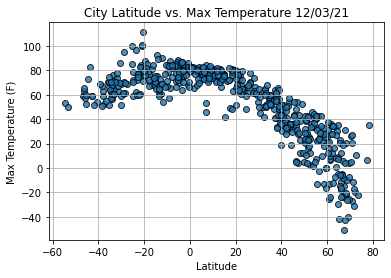

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

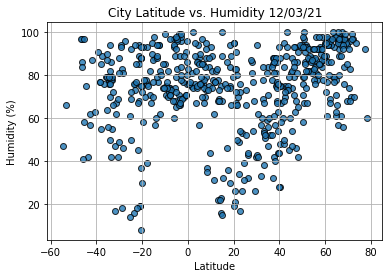

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

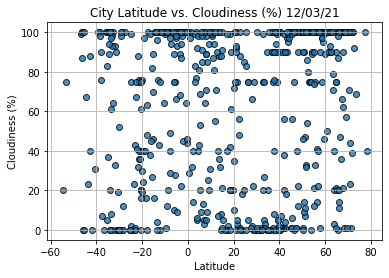

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

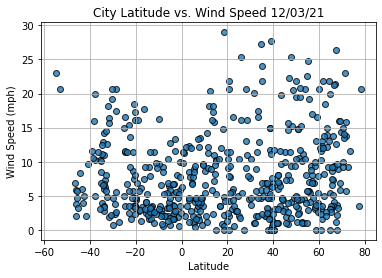

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [18]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [19]:
index13 = city_data_df.loc[13]
index13

City                       Tiznit
Country                        MA
Date          2021-12-04 02:19:38
Lat                       29.5833
Lng                          -9.5
Max Temp                    53.91
Humidity                       42
Cloudiness                      0
Wind Speed                   4.47
Name: 13, dtype: object

In [26]:
city_data_df["Lat"] >= 0

0      False
1      False
2      False
3       True
4       True
       ...  
539    False
540     True
541     True
542     True
543     True
Name: Lat, Length: 544, dtype: bool

In [27]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
3,Albany,US,2021-12-04 02:17:52,42.6001,-73.9662,31.08,70,4,6.85
4,Usinsk,RU,2021-12-04 02:19:34,65.9939,57.5281,-17.73,92,11,7.38
5,Srednekolymsk,RU,2021-12-04 02:19:35,67.4500,153.6833,-14.53,97,100,12.66
6,Belyy Yar,RU,2021-12-04 02:19:35,53.6039,91.3903,33.69,82,0,4.47
8,Vestmannaeyjar,IS,2021-12-04 02:19:36,63.4427,-20.2734,33.85,79,79,12.21


In [28]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

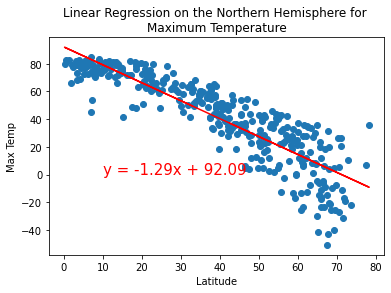

In [70]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for \n'
                       'Maximum Temperature', 'Max Temp',(10,0))

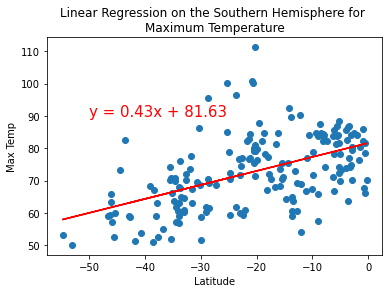

In [69]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for \n'
                       'Maximum Temperature', 'Max Temp',(-50,90))

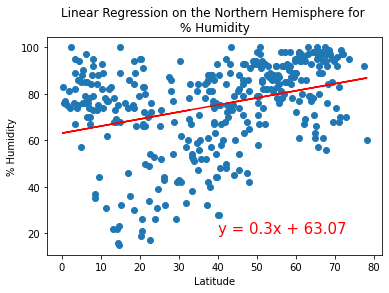

In [68]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for \n'
                       '% Humidity', '% Humidity',(40,20))

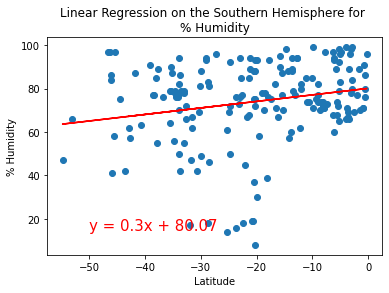

In [67]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for \n'
                       '% Humidity', '% Humidity',(-50,15))

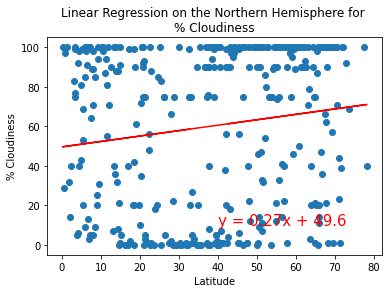

In [66]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for \n'
                       '% Cloudiness', '% Cloudiness',(40,10))

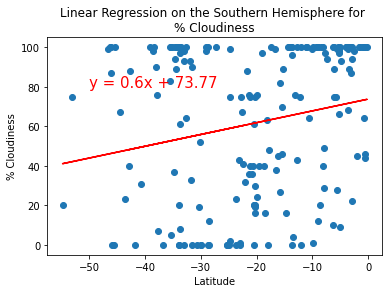

In [63]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for \n'
                       '% Cloudiness', '% Cloudiness',(-50,80))

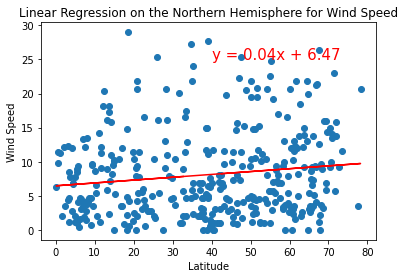

In [52]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,25))

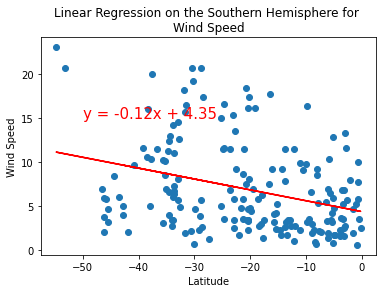

In [62]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for \n' 
                       'Wind Speed', 'Wind Speed',(-50,15))